In [1]:
import myDataPreprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from myDataPreprocessing import myPreprocessor
import tensorflow as tf
from keras import models, layers, optimizers, initializers
from keras.utils import to_categorical
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from keras.callbacks import ReduceLROnPlateau

In [3]:
DATA_DIR = r"D:\Skripsi\Network IDS\Dataset UNSW-NB15\Training and Testing Sets"
training_fname= "UNSW_NB15_training-set.csv"
testing_fname= "UNSW_NB15_testing-set.csv"

In [4]:
import os

# List files in the data directory to debug path issues
print("Files in DATA_DIR:", os.listdir(DATA_DIR))

df1 = pd.read_csv(os.path.join(DATA_DIR, training_fname))
df2 = pd.read_csv(os.path.join(DATA_DIR, testing_fname))
df_ori = pd.concat([df1, df2], ignore_index=True)

Files in DATA_DIR: ['UNSW_NB15_testing-set.csv', 'UNSW_NB15_training-set.csv']


In [5]:
df = df_ori.copy()

In [6]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [7]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', np.nan, data[col])
    return data

In [8]:
cols = df.columns
df = Remove_dump_values(df, cols)

In [9]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.0,0.121478,tcp,NaN,FIN,6.0,4.0,258.0,172.0,74.087490,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
1,2.0,0.649902,tcp,NaN,FIN,14.0,38.0,734.0,42014.0,78.473372,...,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,Normal,0.0
2,3.0,1.623129,tcp,NaN,FIN,8.0,16.0,364.0,13186.0,14.170161,...,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,Normal,0.0
3,4.0,1.681642,tcp,ftp,FIN,12.0,12.0,628.0,770.0,13.677108,...,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,Normal,0.0
4,5.0,0.449454,tcp,NaN,FIN,10.0,6.0,534.0,268.0,33.373826,...,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328.0,0.000005,udp,NaN,INT,2.0,0.0,104.0,0.0,200000.005100,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Normal,0.0
257669,82329.0,1.106101,tcp,NaN,FIN,20.0,8.0,18062.0,354.0,24.410067,...,1.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,Normal,0.0
257670,82330.0,0.000000,arp,NaN,INT,1.0,0.0,46.0,0.0,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Normal,0.0
257671,82331.0,0.000000,arp,NaN,INT,1.0,0.0,46.0,0.0,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Normal,0.0


In [10]:
df.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [11]:
# Drop id and attack cat, service
df.drop(['id','dur','state','sbytes','dbytes','dttl','ct_state_ttl','ct_flw_http_mthd','ct_ftp_cmd','ct_srv_src','ct_srv_dst','tcprtt','synack','ackdat','is_sm_ips_ports','sloss','dloss','sload','sload','spkts','dpkts','dwin','smean','dmean','sjit','djit','sinpkt','dinpkt','attack_cat','service'], axis=1, inplace = True)

In [12]:
x, y = myPreprocessor(df, 'mean', 'label')

Feature 'proto' has 133 unique categories
Feature 'proto' encoded


In [13]:
print(x.head())

      proto      rate      sttl     dload  swin     stcpb     dtcpb  \
0  0.856061  0.000074  0.988235  0.000379   1.0  0.144768  0.512828   
1  0.856061  0.000078  0.243137  0.022458   1.0  0.330128  0.716524   
2  0.856061  0.000014  0.243137  0.002717   1.0  0.492706  0.689918   
3  0.856061  0.000014  0.243137  0.000150   1.0  0.257772  0.243882   
4  0.856061  0.000033  0.996078  0.000178   1.0  0.567209  0.460351   

   trans_depth  response_body_len  ct_dst_ltm  ct_src_dport_ltm  \
0          0.0                0.0    0.000000          0.000000   
1          0.0                0.0    0.000000          0.000000   
2          0.0                0.0    0.017241          0.000000   
3          0.0                0.0    0.017241          0.000000   
4          0.0                0.0    0.017241          0.017241   

   ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_src_ltm  
0               0.0        0.000000          0.00    0.000000  
1               0.0        0.015625       

In [14]:
y.value_counts()

label
1.0    164673
0.0     93000
Name: count, dtype: int64

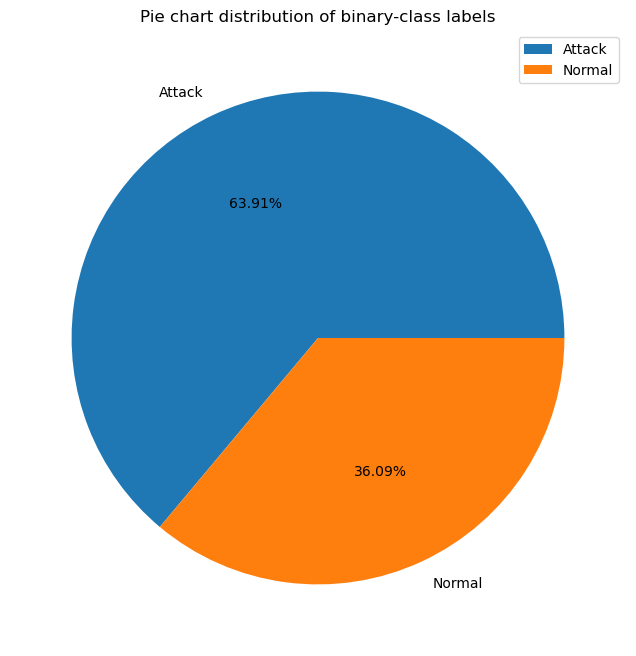

In [15]:
import os

plt.figure(figsize=(8,8))
#plt.pie(y.value_counts(),labels=df.attack_cat.unique(),autopct='%0.2f%%')
plt.pie(y.value_counts(),labels=['Attack','Normal'],autopct='%0.2f%%')
plt.title('Pie chart distribution of binary-class labels')
plt.legend(loc='best')

# Ensure the directory exists before saving
os.makedirs('website/static', exist_ok=True)
plt.savefig('website/static/Pie_chart_bin.png')
plt.show()

In [16]:
smote = SMOTE (sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x, y)

In [17]:
y_sm.value_counts()

label
0.0    164673
1.0    164673
Name: count, dtype: int64

In [18]:
x_sm.shape, y_sm.shape

((329346, 15), (329346,))

In [19]:
x_array = np.array(x_sm)
y_array = np.array(y_sm)

In [20]:
x_3d =np.expand_dims(x_array, axis =2)

In [21]:
unique, counts = np.unique(y_array, return_counts=True)

dict(zip(unique, counts))

{0.0: 164673, 1.0: 164673}

## Model

In [22]:
cnn = models.Sequential([
    layers.Conv1D(32,3,activation='relu',padding='same', kernel_initializer='he_uniform', input_shape = (15, 1)),
    layers.Conv1D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform'),
    layers.MaxPooling1D(pool_size=2,strides=2),

    layers.Dropout(0.002),
    layers.BatchNormalization(),

    layers.Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'),
    layers.Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'),
    layers.MaxPooling1D(pool_size=2,strides=2),
    layers.Dropout(0.002),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid'),   #UNSW-NB15 is 2 and 10,CICIDS2017 is 15
])

cnn.summary()

# Compile the model
optimizer = 'Nadam'
nadam =optimizers.Nadam(learning_rate = 0.008, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
cnn.compile(optimizer="nadam", loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 15, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 7, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,385 (110.88 KB)

 Trainable params: 28,193 (110.13 KB)

 Non-trainable params: 192 (768.00 B)

## Splitting K-Folds

In [23]:
# Define the K-fold Cross Validator
n_folds = 6
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

## Model Fitting

In [24]:
n_epochs = 15
batch_size = 256
verbosity = 1

# Define per-fold score containers
model_history = []
clr = []
cm_all=[]
acc_all=[]
loss_all=[]
recall_all=[]
precision_all=[]
f1_all=[]

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=5)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in skf.split(x_3d, y_array):

    # Get train and test data
    x_train = x_array[train]
    x_test = x_array[test]


    # Reshape for Conv1D: (samples, 15, 1)
    x_train_reshaped = x_train.reshape((x_train.shape[0], 15, 1))
    x_test_reshaped = x_test.reshape((x_test.shape[0], 15, 1))

    cnn = models.Sequential([
        layers.Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(15, 1)),
        layers.Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
        layers.MaxPooling1D(pool_size=2, strides=2),
        layers.Dropout(0.002),
        layers.BatchNormalization(),
        layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
        layers.Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'),
        layers.MaxPooling1D(pool_size=2, strides=2),
        layers.Dropout(0.002),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    cnn.compile(optimizer="nadam", loss='binary_crossentropy', metrics=['accuracy'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history = cnn.fit(
        x_train_reshaped, y_array[train],
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=verbosity,
        validation_split=0.2,
        callbacks=[reduce_lr]
    )

    # Evaluate
    scores = cnn.evaluate(x_test_reshaped, y_array[test], verbose=0)
    print(f'\nScore for fold {fold_no}: {cnn.metrics_names[0]} of {scores[0]}; {cnn.metrics_names[1]} of {scores[1]*100} %')

    y_preds = cnn.predict(x_test_reshaped)
    y_preds1 = np.round(y_preds)

    clr = classification_report(y_array[test], y_preds1, target_names=['Normal', 'Attack'])
    cm = confusion_matrix(y_array[test], y_preds1)
    accuracy = accuracy_score(y_array[test], y_preds1)
    recall = recall_score(y_array[test], y_preds1, average='weighted')
    precision = precision_score(y_array[test], y_preds1, average='weighted')
    f1 = f1_score(y_array[test], y_preds1, average='weighted')

    model_history.append(history)
    cm_all.append(cm)
    acc_all.append(accuracy * 100)
    loss_all.append(scores[0])
    recall_all.append(recall)
    precision_all.append(precision)
    f1_all.append(f1)

    fold_no += 1


c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.8905 - loss: 0.2263 - val_accuracy: 0.8651 - val_loss: 0.3020 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9124 - loss: 0.1846 - val_accuracy: 0.9062 - val_loss: 0.2366 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9168 - loss: 0.1766 - val_accuracy: 0.9020 - val_loss: 0.2382 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9164 - loss: 0.1776 - val_accuracy: 0.8791 - val_loss: 0.2731 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9181 - loss: 0.1738 - val_accuracy: 0.8037 - val_loss: 0.3400 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9191 - loss: 0.1724 - val_accuracy: 0.8549 - val_loss: 0.3558 - l

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8914 - loss: 0.2296 - val_accuracy: 0.8772 - val_loss: 0.2779 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9111 - loss: 0.1865 - val_accuracy: 0.8561 - val_loss: 0.3023 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9144 - loss: 0.1813 - val_accuracy: 0.9040 - val_loss: 0.2634 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9147 - loss: 0.1789 - val_accuracy: 0.9067 - val_loss: 0.2595 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9158 - loss: 0.1771 - val_accuracy: 0.8936 - val_loss: 0.2578 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9151 - loss: 0.1781 - val_accuracy: 0.8558 - val_loss: 0.2564 - learning_rate: 0.0010
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9170 - loss: 0.1737

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.8909 - loss: 0.2270 - val_accuracy: 0.8479 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9129 - loss: 0.1830 - val_accuracy: 0.8571 - val_loss: 0.3455 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9163 - loss: 0.1789 - val_accuracy: 0.8658 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9170 - loss: 0.1766 - val_accuracy: 0.9180 - val_loss: 0.2202 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9183 - loss: 0.1734 - val_accuracy: 0.8409 - val_loss: 0.3085 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9197 - loss: 0.1726 - val_accuracy: 0.8731 - val_loss: 0.2698 - learning_rate: 0.0010
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9182 - loss: 0.1735

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8967 - loss: 0.2202 - val_accuracy: 0.8383 - val_loss: 0.3584 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9116 - loss: 0.1861 - val_accuracy: 0.8844 - val_loss: 0.2455 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9138 - loss: 0.1814 - val_accuracy: 0.8880 - val_loss: 0.2709 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9169 - loss: 0.1772 - val_accuracy: 0.9028 - val_loss: 0.2433 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9157 - loss: 0.1783 - val_accuracy: 0.8961 - val_loss: 0.2732 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9171 - loss: 0.1751 - val_accuracy: 0.9120 - val_loss: 0.2318 - learning_rate: 0.0010
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9181 - loss: 0.1736

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8972 - loss: 0.2165 - val_accuracy: 0.9087 - val_loss: 0.2333 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9134 - loss: 0.1836 - val_accuracy: 0.9242 - val_loss: 0.2110 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9139 - loss: 0.1814 - val_accuracy: 0.8701 - val_loss: 0.3526 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9166 - loss: 0.1762 - val_accuracy: 0.8985 - val_loss: 0.2482 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9175 - loss: 0.1749 - val_accuracy: 0.9036 - val_loss: 0.2628 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9180 - loss: 0.1743 - val_accuracy: 0.8916 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9170 - loss: 0.1758

c:\Users\dandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8945 - loss: 0.2244 - val_accuracy: 0.7805 - val_loss: 0.3815 - learning_rate: 0.0010
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9128 - loss: 0.1842 - val_accuracy: 0.8885 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9147 - loss: 0.1805 - val_accuracy: 0.8811 - val_loss: 0.2584 - learning_rate: 0.0010
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9173 - loss: 0.1775 - val_accuracy: 0.8968 - val_loss: 0.2499 - learning_rate: 0.0010
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9166 - loss: 0.1762 - val_accuracy: 0.9091 - val_loss: 0.2413 - learning_rate: 0.0010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9170 - loss: 0.1755 - val_accuracy: 0.9146 - val_loss: 0.2226 - l

## Final Average Score

In [25]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_all)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Accuracy: {acc_all[i]} % - Loss: {loss_all[i]} - Recall: {recall_all[i]} - Precison: {precision_all[i]} - f1_score: {f1_all[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_all)} % (+- {np.std(acc_all)})')
print(f'> Loss: {np.mean(loss_all)}')
print(f'> Recall: {np.mean(recall_all)}')
print(f'> Precision: {np.mean(precision_all)}')
print(f'> F1-Score: {np.mean(f1_all)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 92.03148057058534 % - Loss: 0.17348867654800415 - Recall: 0.9203148057058534 - Precison: 0.9204692747241919 - f1_score: 0.9203075017165578
------------------------------------------------------------------------
> Fold 2 - Accuracy: 91.97682680220801 % - Loss: 0.1776387095451355 - Recall: 0.9197682680220801 - Precison: 0.9198267936057893 - f1_score: 0.9197654812179044
------------------------------------------------------------------------
> Fold 3 - Accuracy: 92.2063726293928 % - Loss: 0.1693582385778427 - Recall: 0.922063726293928 - Precison: 0.9220684736503498 - f1_score: 0.9220635097391525
------------------------------------------------------------------------
> Fold 4 - Accuracy: 91.78007323604963 % - Loss: 0.18182583153247833 - Recall: 0.9178007323604963 - Precison: 0.9180280099859508 - f1_score: 0.9

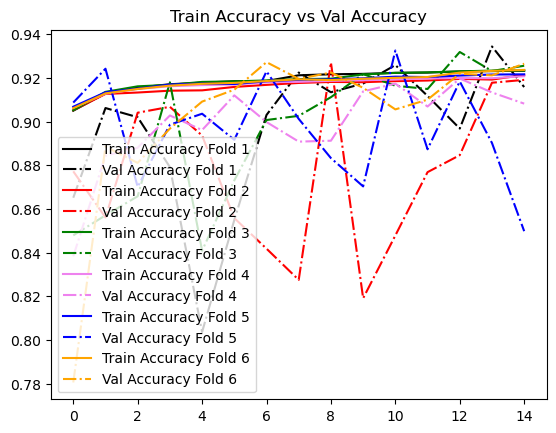

In [26]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='violet', )
plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='violet', linestyle = "dashdot")
plt.plot(model_history[4].history['accuracy'], label='Train Accuracy Fold 5', color='blue', )
plt.plot(model_history[4].history['val_accuracy'], label='Val Accuracy Fold 5', color='blue', linestyle = "dashdot")
plt.plot(model_history[5].history['accuracy'], label='Train Accuracy Fold 6', color='orange', )
plt.plot(model_history[5].history['val_accuracy'], label='Val Accuracy Fold 6', color='orange', linestyle = "dashdot")
plt.legend(loc="lower left")
# Ensure the directory exists before saving
os.makedirs('static', exist_ok=True)
plt.savefig('static/trainVsVal.png')
# plt.savefig("/content/gdrive/MyDrive/Kuliah/SKRIPSI/trainVsVal_acc3.png")
plt.show()

In [27]:
for i in range(n_folds):
  print(f"Fold {i+1}\n")
  print(clr)

Fold 1

              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92     27445
      Attack       0.92      0.92      0.92     27446

    accuracy                           0.92     54891
   macro avg       0.92      0.92      0.92     54891
weighted avg       0.92      0.92      0.92     54891

Fold 2

              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92     27445
      Attack       0.92      0.92      0.92     27446

    accuracy                           0.92     54891
   macro avg       0.92      0.92      0.92     54891
weighted avg       0.92      0.92      0.92     54891

Fold 3

              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92     27445
      Attack       0.92      0.92      0.92     27446

    accuracy                           0.92     54891
   macro avg       0.92      0.92      0.92     54891
weighted avg       0.92      0.92      0.92     54

Fold 1



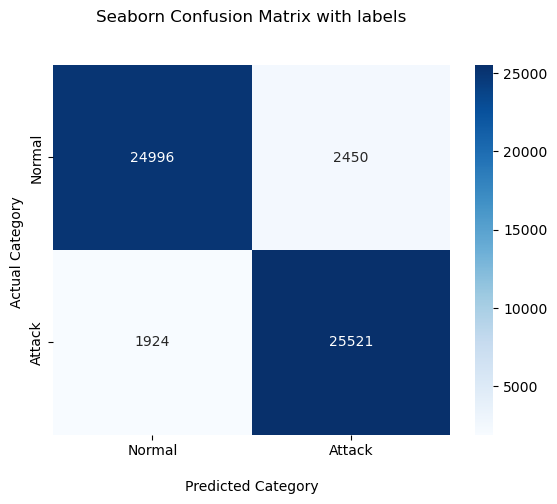

Fold 2



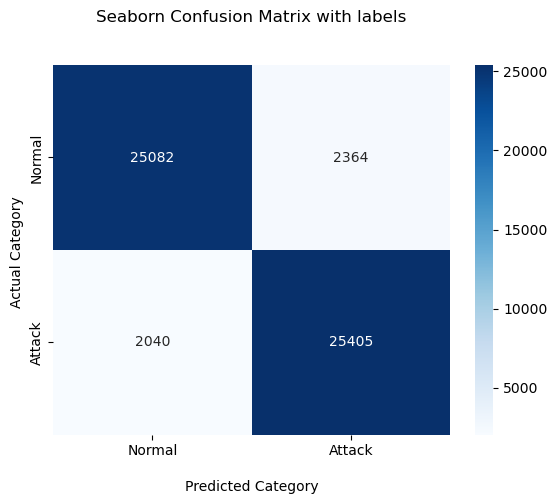

Fold 3



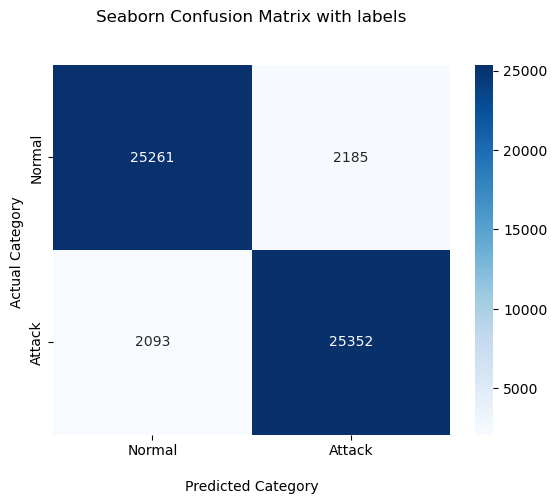

Fold 4



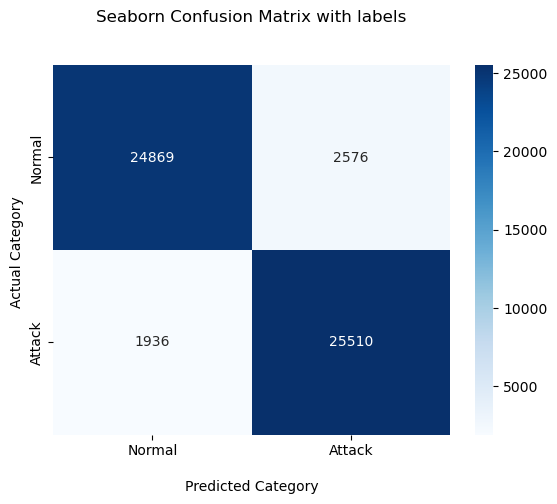

Fold 5



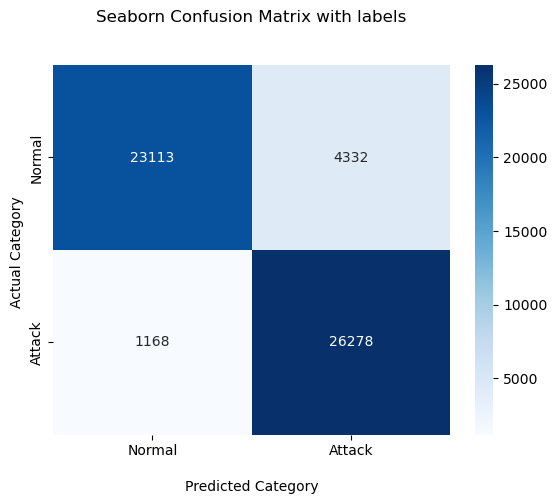

Fold 6



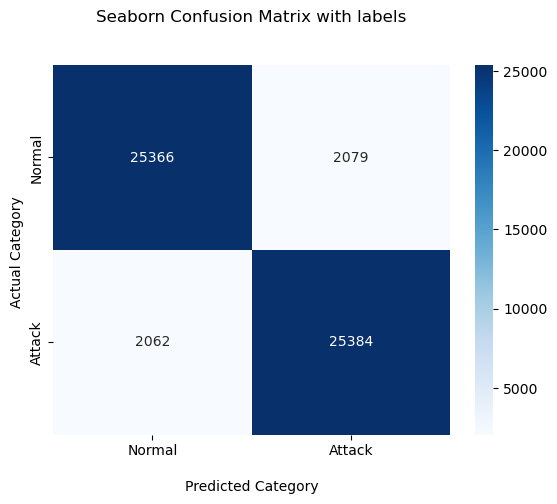

In [28]:
import seaborn as sns
for i in range(n_folds):
  print(f"Fold {i+1}\n")
  ax = sns.heatmap(cm_all[i], annot=True, cmap='Blues', fmt='d')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Normal','Attack'])
  ax.yaxis.set_ticklabels(['Normal','Attack'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

## Save Model

In [29]:
cnn.save('../model/CNNUpdate.h5')

In [30]:
from sklearn.preprocessing import StandardScaler
import joblib

print("x shape:", x.shape)  # Should be (N, 15)
scaler = StandardScaler()
scaler.fit(x)
joblib.dump(scaler, '../model/scaler.save')
print("Scaler saved!")

x shape: (257673, 15)
Scaler saved!


In [31]:
cnn.save('../model/CNN1.1.keras')